# Bayesian Machine Learning Final Project

Bradley Katcher, Elizabeth Driskill, and Mariah Hurt

In [1]:
# Loading required packages
import pandas as pd
from pomegranate import *
import pygraphviz
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading in the data
# Can download here: https://www.kaggle.com/ronitf/heart-disease-uci
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Uncomment the line below to install pygraphviz if needed
# pip install pygraphviz --install-option="--include-path=/usr/local/include/graphviz/" --install-option="--library-path=/usr/local/lib/graphviz"

In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Change coding for discrete variables:
heart.sex = heart['sex'].replace({0: 'Female', 1: 'Male'})
# The coding on this variable was taken from this dictionary: https://www.kaggle.com/mercheovejero/heart-attack-a-crazy-data-dictionary
heart.cp = heart['cp'].replace({0: 'Asymptomatic', 1: "Atypical Angina", 2: 'Non-anginal pain', 3: 'Typical Angina'}) 
heart.exang = heart['exang'].replace({0: 'No Exercise Induced Angina', 1: 'Has Exercise Induced Angina'})
heart.target = heart['target'].replace({0: "No Heart Disease", 1: "Has Heart Disease"})
heart.fbs = heart['fbs'].replace({0: 'Normal Fasting Blood Sugar', 1: "High Fasting Blood Sugar"})
heart.restecg = heart['restecg'].replace({0: 'Normal EKG results', 1: "Abnormal EKG Results", 2: 'Left Ventricular Hypertrophy'})
heart.slope = heart['slope'].replace({0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'})
heart.ca = heart['ca'].replace({0: 'No Vesssels colored by Flourosopy', 1: '1 Vessel colored by Flourosopy', 2: '2 Vessels colored by Flourosopy', 3: '3 Vessels colored by Flourosopy'})
heart.thal = heart['thal'].replace({3: 'Normal', 6: 'Fixed Defect', 7: 'Reversable Defect'})

Each group member built their own Bayesian network to predict the presence of heart disease.
These three models are outlined below.

## Model A (Bradley)

In [7]:
# Sex is independent so I create this as independent (discrete distribution):
sex = DiscreteDistribution.from_samples(heart.sex)

In [8]:
# Create exercise induced angina conditioned on sex
heart_exang = heart[['sex','exang']]
heart_exang_np = heart_exang.to_numpy()
exang = ConditionalProbabilityTable.from_samples(heart_exang_np, [sex], weights=None)

In [9]:
# Create type of chest pain conditioned on sex and exercise induced angina:
heart_sex_exang = heart[['sex', 'exang', 'cp']]
heart_sex_exang_np = heart_sex_exang.to_numpy()
cp = ConditionalProbabilityTable.from_samples(heart_sex_exang_np, [sex, exang], weights = None)

In [10]:
# Create heart disease conditioned on sex, chest pain, and exercise induced angina:
heart_sex_exang_chest = heart[['sex', 'exang', 'cp', 'target']]
heart_sex_exang_chest_np = heart_sex_exang_chest.to_numpy()
target = ConditionalProbabilityTable.from_samples(heart_sex_exang_chest_np, [sex, exang, cp], weights = None)

In [11]:
# Build the model:
s1 = Node(sex, name = 'Sex')
s2 = Node(cp, name = 'Chest Pain')
s3 = Node(exang, name = 'Exercise Induced Angina')
s4 = Node(target, name = "Heart Disease")

In [12]:
# Initialize Bayesian Network
network = BayesianNetwork()

In [13]:
# Add states and transitions:
network.add_states(s1, s2, s3, s4)

network.add_transition( s1, s2)
network.add_transition( s1, s3)
network.add_transition( s1, s4)
network.add_transition( s2, s4)
network.add_transition( s3, s2)
network.add_transition( s3, s4)

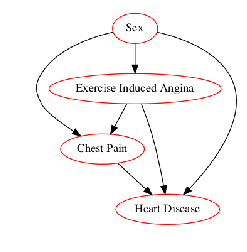

In [14]:
# Plot the Bayes Net:
network.plot()

In [15]:
# Finalize the topology of the model:
network.bake()

Examining conditional probabilities:

In [16]:
sex

{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Male" :0.6831683168316832,
            "Female" :0.31683168316831684
        }
    ],
    "frozen" :false
}

In [17]:
exang

{
    "class" : "Distribution",
    "name" : "ConditionalProbabilityTable",
    "table" : [
        [
            "Male",
            "No Exercise Induced Angina",
            "0.6280193236714976"
        ],
        [
            "Male",
            "Has Exercise Induced Angina",
            "0.3719806763285024"
        ],
        [
            "Female",
            "No Exercise Induced Angina",
            "0.7708333333333334"
        ],
        [
            "Female",
            "Has Exercise Induced Angina",
            "0.22916666666666666"
        ]
    ],
    "dtypes" : [
        "str",
        "str",
        "float"
    ],
    "parents" : [
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "Male" : 0.6831683168316832,
                    "Female" : 0.31683168316831684
                }
            ],
            "frozen" : false
        }
  

In [19]:
cp

{
    "class" : "Distribution",
    "name" : "ConditionalProbabilityTable",
    "table" : [
        [
            "Male",
            "No Exercise Induced Angina",
            "Non-anginal pain",
            "0.33076923076923076"
        ],
        [
            "Male",
            "No Exercise Induced Angina",
            "Typical Angina",
            "0.1153846153846154"
        ],
        [
            "Male",
            "No Exercise Induced Angina",
            "Asymptomatic",
            "0.3230769230769231"
        ],
        [
            "Male",
            "No Exercise Induced Angina",
            "Atypical Angina",
            "0.23076923076923078"
        ],
        [
            "Male",
            "Has Exercise Induced Angina",
            "Non-anginal pain",
            "0.11688311688311687"
        ],
        [
            "Male",
            "Has Exercise Induced Angina",
            "Typical Angina",
            "0.051948051948051945"
        ],
        [
            

In [20]:
target

{
    "class" : "Distribution",
    "name" : "ConditionalProbabilityTable",
    "table" : [
        [
            "Male",
            "No Exercise Induced Angina",
            "Non-anginal pain",
            "No Heart Disease",
            "0.3023255813953489"
        ],
        [
            "Male",
            "No Exercise Induced Angina",
            "Non-anginal pain",
            "Has Heart Disease",
            "0.6976744186046512"
        ],
        [
            "Male",
            "No Exercise Induced Angina",
            "Typical Angina",
            "No Heart Disease",
            "0.4"
        ],
        [
            "Male",
            "No Exercise Induced Angina",
            "Typical Angina",
            "Has Heart Disease",
            "0.6"
        ],
        [
            "Male",
            "No Exercise Induced Angina",
            "Asymptomatic",
            "No Heart Disease",
            "0.6428571428571429"
        ],
        [
            "Male",
            "N

## Model B (Elizabeth)

In [123]:
# Fbs is independent so I create this as independent (discrete distribution):
fbs = DiscreteDistribution.from_samples(heart.fbs)

In [124]:
# Create restecg conditioned on fbs
restecg1 = heart[['fbs','restecg']]
restecg_np = restecg1.to_numpy()
restecg = ConditionalProbabilityTable.from_samples(restecg_np, [fbs], weights=None)

In [125]:
# Create exercise induced angina conditioned on fbs
exang1 = heart[['fbs','exang']]
exang_np = exang1.to_numpy()
exang = ConditionalProbabilityTable.from_samples(exang_np, [fbs], weights=None)

In [126]:
# Create cp conditioned on restecg and exang
cp1 = heart[['restecg','exang','cp']]
cp_np = cp1.to_numpy()
cp = ConditionalProbabilityTable.from_samples(cp_np, [restecg,exang], weights=None)

In [127]:
# Create slope conditioned on cp
slope1 = heart[['cp','slope']]
slope_np = slope1.to_numpy()
slope = ConditionalProbabilityTable.from_samples(slope_np, [cp], weights=None)

In [128]:
# Create chd conditioned on slope
chd1 = heart[['slope','target']]
chd_np = chd1.to_numpy()
chd = ConditionalProbabilityTable.from_samples(chd_np, [slope], weights=None)

In [129]:
# Build the model:
s1 = Node(fbs, name = 'Fasting Blood Sugar')
s2 = Node(exang, name = 'Exercise Induced Angina')
s3 = Node(restecg, name = "Resting EKG")
s4 = Node(cp, name = 'Chest Pain')
s5 = Node(slope, name = 'Slope of ST Segment')
s6 = Node(chd, name = "Coronary Heart Disease")

In [130]:
# Initialize Bayesian Network
network = BayesianNetwork()

In [131]:
# Add states and transitions:
network.add_states(s1, s2, s3, s4, s5, s6)

network.add_transition(s1, s2)
network.add_transition(s1, s3)
network.add_transition(s2, s4)
network.add_transition(s3, s4)
network.add_transition(s4, s5)
network.add_transition(s5, s6)

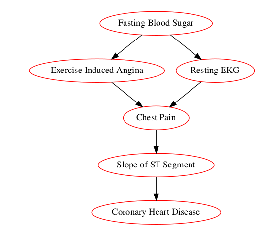

In [132]:
# Plot the Bayes Net:
network.plot()

In [133]:
# Finalize the topology of the model:
network.bake()

Examining conditional probabilities:

In [134]:
fbs

{
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "1" :0.1485148514851485,
            "0" :0.8514851485148515
        }
    ],
    "frozen" :false
}

In [135]:
exang

{
    "class" : "Distribution",
    "name" : "ConditionalProbabilityTable",
    "table" : [
        [
            "1",
            "0",
            "0.6444444444444445"
        ],
        [
            "1",
            "1",
            "0.35555555555555557"
        ],
        [
            "0",
            "0",
            "0.6782945736434108"
        ],
        [
            "0",
            "1",
            "0.32170542635658916"
        ]
    ],
    "dtypes" : [
        "numpy.int64",
        "numpy.int64",
        "float"
    ],
    "parents" : [
        {
            "class" : "Distribution",
            "dtype" : "int",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "1" : 0.1485148514851485,
                    "0" : 0.8514851485148515
                }
            ],
            "frozen" : false
        }
    ]
}

In [136]:
restecg

{
    "class" : "Distribution",
    "name" : "ConditionalProbabilityTable",
    "table" : [
        [
            "1",
            "0",
            "0.5777777777777777"
        ],
        [
            "1",
            "1",
            "0.4222222222222222"
        ],
        [
            "1",
            "2",
            "0.0"
        ],
        [
            "0",
            "0",
            "0.4689922480620155"
        ],
        [
            "0",
            "1",
            "0.5155038759689923"
        ],
        [
            "0",
            "2",
            "0.015503875968992251"
        ]
    ],
    "dtypes" : [
        "numpy.int64",
        "numpy.int64",
        "float"
    ],
    "parents" : [
        {
            "class" : "Distribution",
            "dtype" : "int",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "1" : 0.1485148514851485,
                    "0" : 0.8514851485148515
                }
     

In [137]:
cp

{
    "class" : "Distribution",
    "name" : "ConditionalProbabilityTable",
    "table" : [
        [
            "0",
            "0",
            "0",
            "0.3548387096774194"
        ],
        [
            "0",
            "0",
            "1",
            "0.1827956989247312"
        ],
        [
            "0",
            "0",
            "2",
            "0.3333333333333333"
        ],
        [
            "0",
            "0",
            "3",
            "0.12903225806451615"
        ],
        [
            "0",
            "1",
            "0",
            "0.8333333333333334"
        ],
        [
            "0",
            "1",
            "1",
            "0.037037037037037035"
        ],
        [
            "0",
            "1",
            "2",
            "0.09259259259259259"
        ],
        [
            "0",
            "1",
            "3",
            "0.037037037037037035"
        ],
        [
            "1",
            "0",
            "0",
 

In [138]:
slope

{
    "class" : "Distribution",
    "name" : "ConditionalProbabilityTable",
    "table" : [
        [
            "0",
            "0",
            "0.07692307692307693"
        ],
        [
            "0",
            "1",
            "0.5874125874125874"
        ],
        [
            "0",
            "2",
            "0.3356643356643357"
        ],
        [
            "1",
            "0",
            "0.04000000000000001"
        ],
        [
            "1",
            "1",
            "0.24"
        ],
        [
            "1",
            "2",
            "0.72"
        ],
        [
            "2",
            "0",
            "0.0574712643678161"
        ],
        [
            "2",
            "1",
            "0.3793103448275862"
        ],
        [
            "2",
            "2",
            "0.5632183908045977"
        ],
        [
            "3",
            "0",
            "0.13043478260869565"
        ],
        [
            "3",
            "1",
         

In [139]:
chd

{
    "class" : "Distribution",
    "name" : "ConditionalProbabilityTable",
    "table" : [
        [
            "0",
            "0",
            "0.5714285714285714"
        ],
        [
            "0",
            "1",
            "0.42857142857142855"
        ],
        [
            "1",
            "0",
            "0.65"
        ],
        [
            "1",
            "1",
            "0.3499999999999999"
        ],
        [
            "2",
            "0",
            "0.2464788732394366"
        ],
        [
            "2",
            "1",
            "0.7535211267605634"
        ]
    ],
    "dtypes" : [
        "numpy.int64",
        "numpy.int64",
        "float"
    ],
    "parents" : [
        {
            "class" : "Distribution",
            "name" : "ConditionalProbabilityTable",
            "table" : [
                [
                    "0",
                    "0",
                    "0.07692307692307693"
                ],
                [
            

## Model C (Mariah)

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

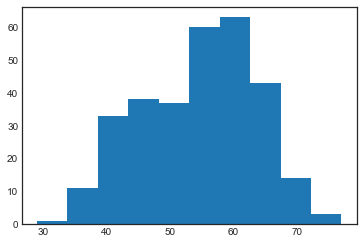

In [140]:
# Pomegranate can only take categorical variables so transform the variables we are planning to use
# In order to decide how to make categories for age, I plotted a histogram and did some research
plt.hist(heart["age"]) 

In [141]:
# Current research shows that adults over 65 are more likely to suffer from heart disease
# https://www.nia.nih.gov/health/heart-health-and-aging
# So I will make two categories, over 65 and under 65
heart['age65'] = np.where(heart['age']>=65,1,0)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age65,chol150
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,Cholesterol Over 150
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,Cholesterol Over 150
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,Cholesterol Over 150
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,Cholesterol Over 150
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,Cholesterol Over 150


(array([ 12.,  73., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <a list of 10 Patch objects>)

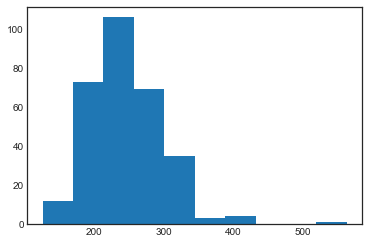

In [142]:
# Create a histogram of cholesterol levels 
plt.hist(heart["chol"])

In [143]:
# Create categorical variables for cholesterol based on levels from
# https://medlineplus.gov/cholesterollevelswhatyouneedtoknow.html
heart['chol150'] = np.where(heart['chol']<=150,1,0)

In [144]:
# df[df['first_name'].notnull() & (df['nationality'] == "USA")]

heart2 = heart[heart['age65'] == 0]
heart3 = heart2[heart2['fbs'] == 1]
heart4 = heart3[heart3['chol150']==1]
heart4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age65,chol150
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,0,1


In [145]:
# Change coding for discrete variables:
heart.age65 = heart['age65'].replace({0: 'Under 65', 1: 'Over 65'})
heart.chol150 = heart['chol150'].replace({1: 'Cholesterol Under 150', 0: "Cholesterol Over 150"})

In [146]:
# Age is independent so I create this as independent (discrete distribution):
age = DiscreteDistribution.from_samples(heart.age65)

In [147]:
# Create fasting blood sugar dependent on age
heart_fbs = heart[['age65','fbs']]
heart_fbs_np = heart_fbs.to_numpy()
FBS = ConditionalProbabilityTable.from_samples(heart_fbs_np, [age], weights=None)

In [148]:
# Create cholesterol dependent on age
heart_chol = heart[['age65','chol150']]
heart_chol_np = heart_chol.to_numpy()
CHOL = ConditionalProbabilityTable.from_samples(heart_chol_np, [age], weights=None)

In [149]:
# Create heart disease conditioned on age, cholesterol level, fasting blood sugar:
heart_age_chol_fbs = heart[['age65', 'fbs','chol150', 'target']]
heart_age_chol_fbs_np = heart_age_chol_fbs.to_numpy()
target = ConditionalProbabilityTable.from_samples(heart_age_chol_fbs_np, [age, FBS, CHOL], weights = None)

In [150]:
# Build the model:
s1 = Node(age, name = 'Age: Above 65')
s2 = Node(FBS, name = 'Fasting Blood Sugar')
s3 = Node(CHOL, name = 'Cholesterol Level Above 150')
s4 = Node(target, name = 'Heart Disease')

In [151]:
# Initialize Bayesian Network
network = BayesianNetwork()

In [152]:
# Add states and transitions:
network.add_states(s1, s2, s3, s4)

network.add_transition( s1, s2)
network.add_transition( s1, s3)
network.add_transition( s1, s4)
network.add_transition( s2, s4)
network.add_transition( s3, s4)

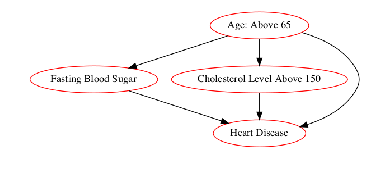

In [153]:
# Plot the Bayes Net:
network.plot()

In [107]:
# Finalize the topology of the model:
network.bake()

Examining conditional probabilities:

In [108]:
target

{
    "class" : "Distribution",
    "name" : "ConditionalProbabilityTable",
    "table" : [
        [
            "Under 65",
            "0",
            "Cholesterol Over 150",
            "0",
            "0.44594594594594594"
        ],
        [
            "Under 65",
            "0",
            "Cholesterol Over 150",
            "1",
            "0.5540540540540541"
        ],
        [
            "Under 65",
            "0",
            "Cholesterol Under 150",
            "0",
            "0.6666666666666666"
        ],
        [
            "Under 65",
            "0",
            "Cholesterol Under 150",
            "1",
            "0.3333333333333333"
        ],
        [
            "Under 65",
            "1",
            "Cholesterol Over 150",
            "0",
            "0.4722222222222222"
        ],
        [
            "Under 65",
            "1",
            "Cholesterol Over 150",
            "1",
            "0.5277777777777778"
        ],
        [
       

## Using Pomegranate Algorithm to Create Best Model

Exact algorithm iterates through all possible combinations of the variables and returns the best Bayesian network.

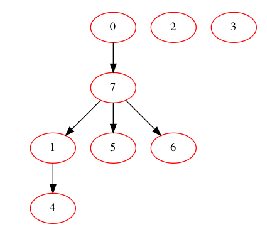

In [158]:
X = heart[['sex','cp','fbs','restecg','exang','slope','ca','target']]
model = BayesianNetwork.from_samples(X, algorithm='exact')
model.plot()

In [159]:
X.head(3)

,sex,cp,fbs,restecg,exang,slope,ca,target
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,1
2,0,1,0,0,0,2,0,1


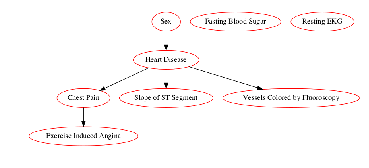

In [161]:
# Creating this same network, but renaming the variables for visualization purposes
ca = DiscreteDistribution.from_samples(heart.ca)

s1 = Node(sex, name = 'Sex')
s2 = Node(cp, name = 'Chest Pain')
s3 = Node(fbs, name = 'Fasting Blood Sugar')
s4 = Node(restecg, name = 'Resting EKG')
s5 = Node(exang, name = 'Exercise Induced Angina')
s6 = Node(slope, name = 'Slope of ST Segment')
s7 = Node(ca, name = 'Vessels Colored by Fluoroscopy')
s8 = Node(target, name = 'Heart Disease')

network = BayesianNetwork()

network.add_states(s1, s2, s3, s4, s5, s6, s7, s8)

network.add_transition( s1, s8)
network.add_transition( s8, s2)
network.add_transition( s8, s6)
network.add_transition( s8, s7)
network.add_transition( s2, s5)

network.plot()

## Sources

https://www.kaggle.com/ronitf/heart-disease-uci  
https://pomegranate.readthedocs.io/en/latest/BayesianNetwork.html  
https://github.com/jmschrei/pomegranate/issues/632 
https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_4b_Bayesian_Network_Structure_Learning.ipynb